In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

The things to normally look out for are:

- Missing values and a strategy to handle them

- skewed data distribution for numerical fields and how to normalize it

- outlier treatment

It is also important to build hypothesis and attempt to visually test them too...

In [2]:
train = pd.read_csv("Data/loans.csv")

In [3]:
train_original = train.copy()

In [4]:
train_original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


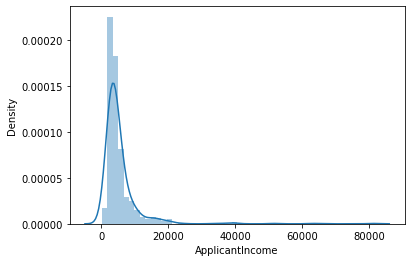

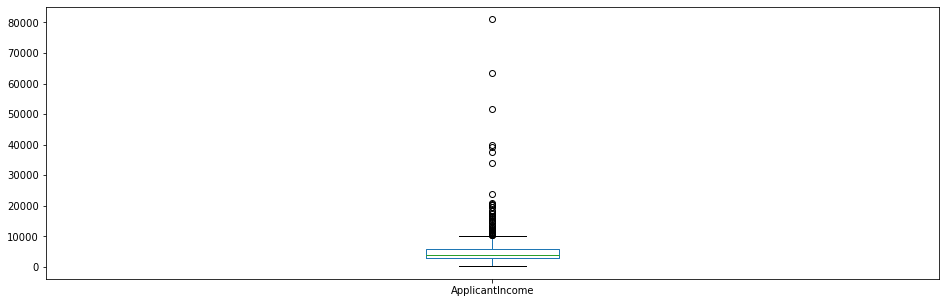

In [5]:
sns.distplot(train['ApplicantIncome'])
plt.show()
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different eduation levels. Let us segregate them by Education.

Text(0.5, 0.98, '')

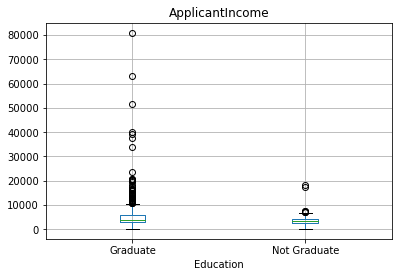

In [6]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be outliers.

Let's look at the Coapplicant income distribution.

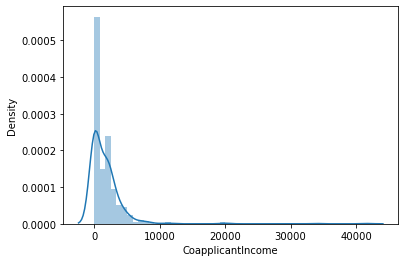

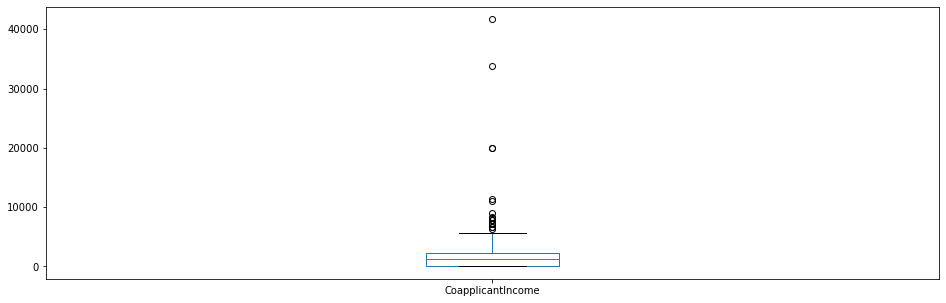

In [7]:
sns.distplot(train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

We see a similar distribution as that of the applicant's income. The majority of co-applicants income ranges from 0 to 5000. We also see a lot of outliers in the applicant's income and it is not normally distributed.

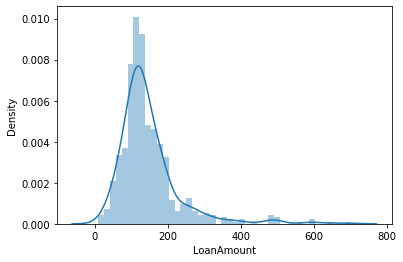

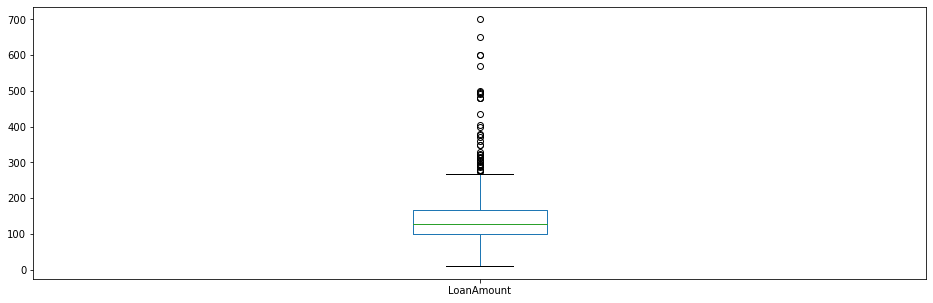

In [8]:
train.notna()
sns.distplot(train['LoanAmount'])
plt.show()
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

## Hypothesis to work with

We can use Bivariate analysis to identify features that potentiall have an impact on the target variable


our hypothesis are as follows:

- Applicants with high incomes should have more chances of loan approval.

- Applicants who have repaid their previous debts should have higher chances of loan approval.

- Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.


- Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.

First of all, we will find the relation between the target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

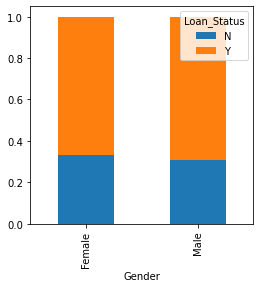

In [9]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.

Now let us visualize the remaining categorical variables vs target variable.

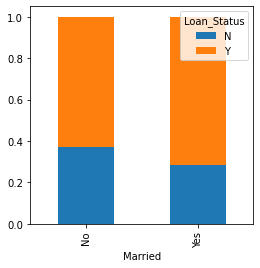

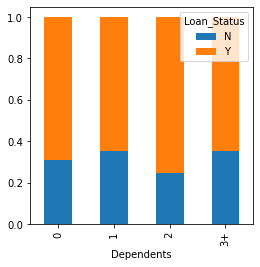

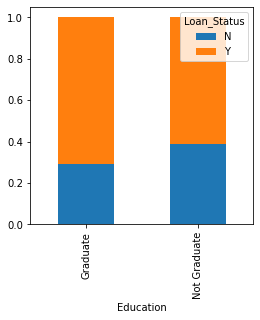

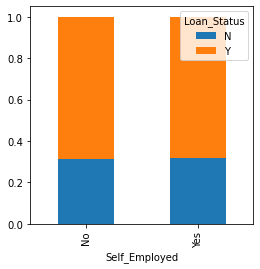

In [10]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

The distribution of dependents to loan approval don't make a lot of sense to me and the distribution of self_employed may mean it has no real impact on loan approval.

Now we will look at the relationship between remaining categorical independent variables and Loan_Status

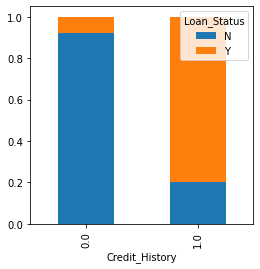

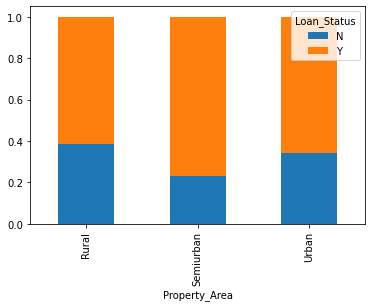

In [11]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

It seems people with a credit history as 1 are more likely to get their loans approved.*
The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

<AxesSubplot:xlabel='Loan_Status'>

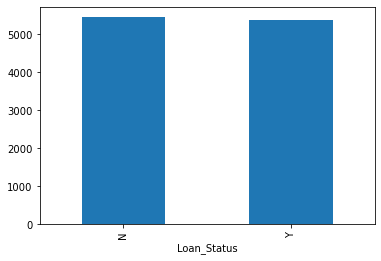

In [12]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don't see any change in the mean income. So, let's make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

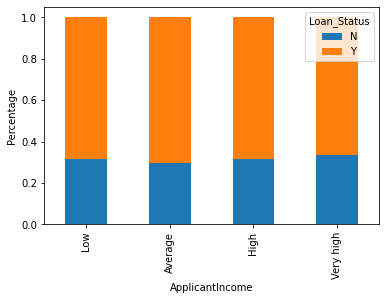

In [13]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount variable in similar manner.

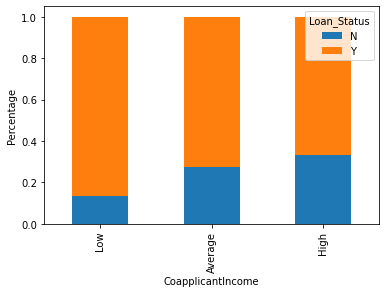

In [14]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

It shows that if co-applicants income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don't have any co-applicant so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it. So, we can make a new variable in which we will combine the applicant's and co-applicants income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

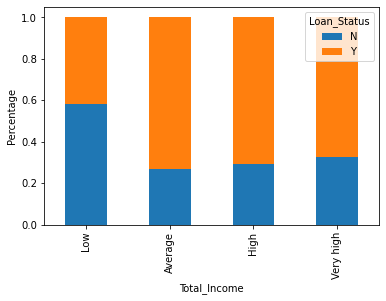

In [15]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less compared to that of applicants with Average, High & Very High Income.

Let's visualize the Loan Amount variable.

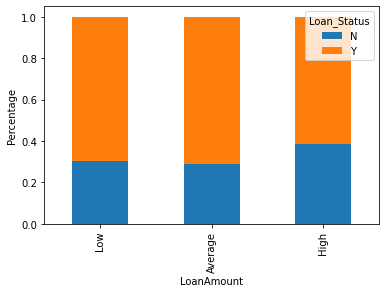

In [16]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [17]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True)

train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

Now let's look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more

<AxesSubplot:>

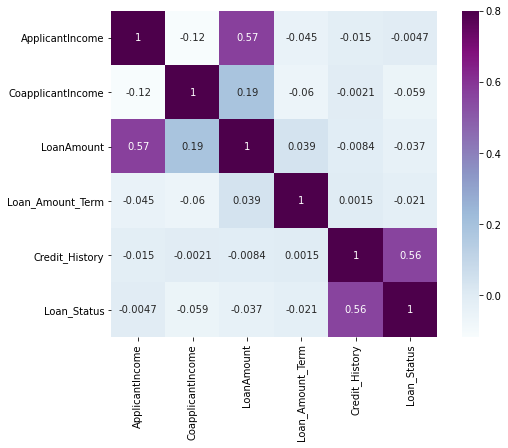

In [18]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

We see that the most correlate variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

## Missing value imputation

Let's list out feature-wise count of missing values.

In [19]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

For numerical variables: imputation using mean or median
For categorical variables: imputation using mode
There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.

In [20]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.



In [21]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [22]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use the median to fill the null values as earlier we saw that the loan amount has outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [23]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

Now lets check whether all the missing values are filled in the dataset.

In [24]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the test dataset. Let’s fill all the missing values in the test dataset too with the same approach.

## Outlier Treatment

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Let's examine what can happen to a data set with outliers. 

For the sample data set:
1,1,2,2,2,2,3,3,3,4,4

We find the following: mean, median, mode, and standard deviation

Mean = 2.58

Median = 2.5

Mode=2

Standard Deviation = 1.08

If we add an outlier to the data set:

1,1,2,2,2,2,3,3,3,4,4,400

The new values of our statistics are:

Mean = 35.38

Median = 2.5

Mode=2

Standard Deviation = 114.74

It can be seen that having **outliers often has a significant effect on the mean and standard deviation** and hence affecting the distribution. We must take steps to remove outliers from our data sets.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

In [25]:
train['LoanAmount_log']=np.log(train['LoanAmount'])


<AxesSubplot:>

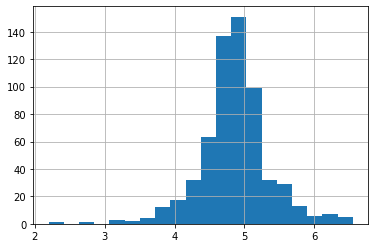

In [26]:
train['LoanAmount_log'].hist(bins=20)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let's build a logistic regression model and make predictions for the test dataset.

<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

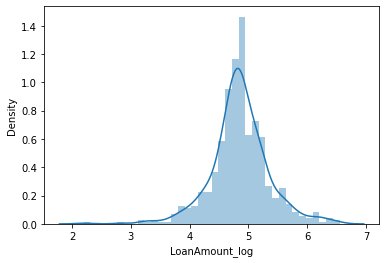

In [27]:
sns.distplot(train['LoanAmount_log'])

## Model Building

In [28]:
train=train.drop('Loan_ID',axis=1)

In [29]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [30]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)

In [31]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


In [32]:
train.shape

(614, 22)

In [33]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,1,0,0,1,0,1,0,0,0,1


## Feature Engineering


Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

- Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

- EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

- Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [34]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

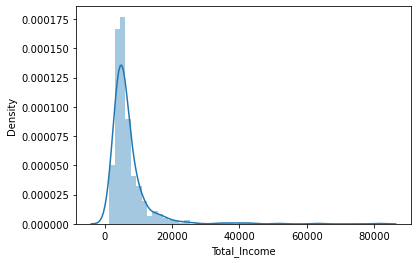

In [35]:
sns.distplot(train['Total_Income'])

<AxesSubplot:xlabel='Total_Income_log', ylabel='Density'>

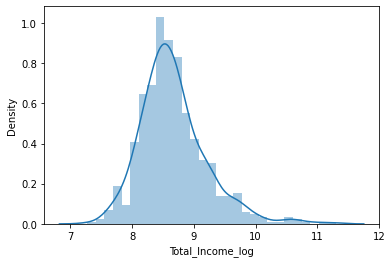

In [36]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])

In [37]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']

<AxesSubplot:xlabel='EMI', ylabel='Density'>

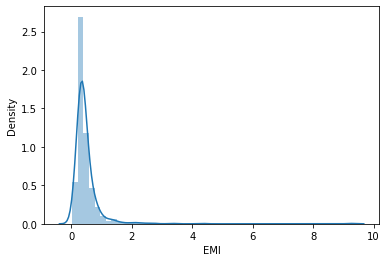

In [38]:
sns.distplot(train['EMI'])

In [39]:
# train['EMI_log'] = np.log(train['EMI'])
# sns.distplot(train['EMI_log'])

<AxesSubplot:xlabel='Balance_Income', ylabel='Density'>

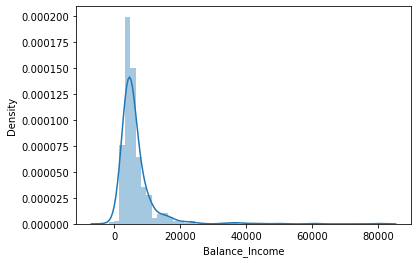

In [40]:
train['Balance_Income'] = train['Total_Income']-(train['EMI']*1000)
# test['Balance Income'] = test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance_Income'])

In [41]:
# train['Balance_Income_log'] = np.log(train['Balance Income'])
# sns.distplot(train['Balance_Income_log'])

Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [42]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'LoanAmount_log', 'Loan_Amount_Term', 'Total_Income', 'Total_Income_log'], axis=1)

In [43]:
train.shape

(614, 19)

In [44]:
train.head()

,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,EMI,Balance_Income
0,1.0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0.355556,5493.444444
1,1.0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0.355556,5735.444444
2,1.0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0.183333,2816.666667
3,1.0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0.333333,4607.666667
4,1.0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0.391667,5608.333333


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

In [46]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [47]:
# X.head

In [48]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=metrics.accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8130081300813008

2 of kfold 5 
accuracy_score 0.8048780487804879

3 of kfold 5 
accuracy_score 0.7804878048780488

4 of kfold 5 
accuracy_score 0.7967479674796748

5 of kfold 5 
accuracy_score 0.7622950819672131

 Mean Validation Accuracy 0.7914834066373451


In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [50]:
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [51]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3, random_state=1)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [52]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=61, random_state=1)

In [53]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=7, n_estimators=61)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = metrics.accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8130081300813008

2 of kfold 5 
accuracy_score 0.8373983739837398

3 of kfold 5 
accuracy_score 0.7886178861788617

4 of kfold 5 
accuracy_score 0.8048780487804879

5 of kfold 5 
accuracy_score 0.7868852459016393

 Mean Validation Accuracy 0.806157536985206


Let us find the feature importance now, i.e. which features are most important for this problem. We will use featureimportances attribute of sklearn to do so.

<AxesSubplot:>

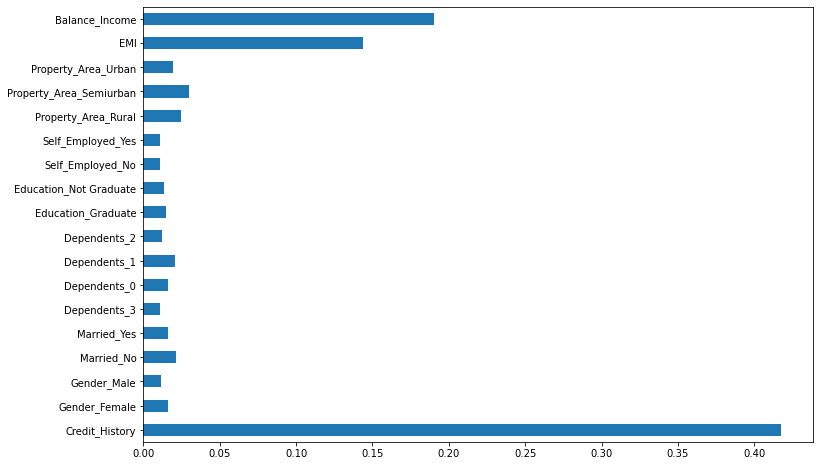

In [54]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

<AxesSubplot:>

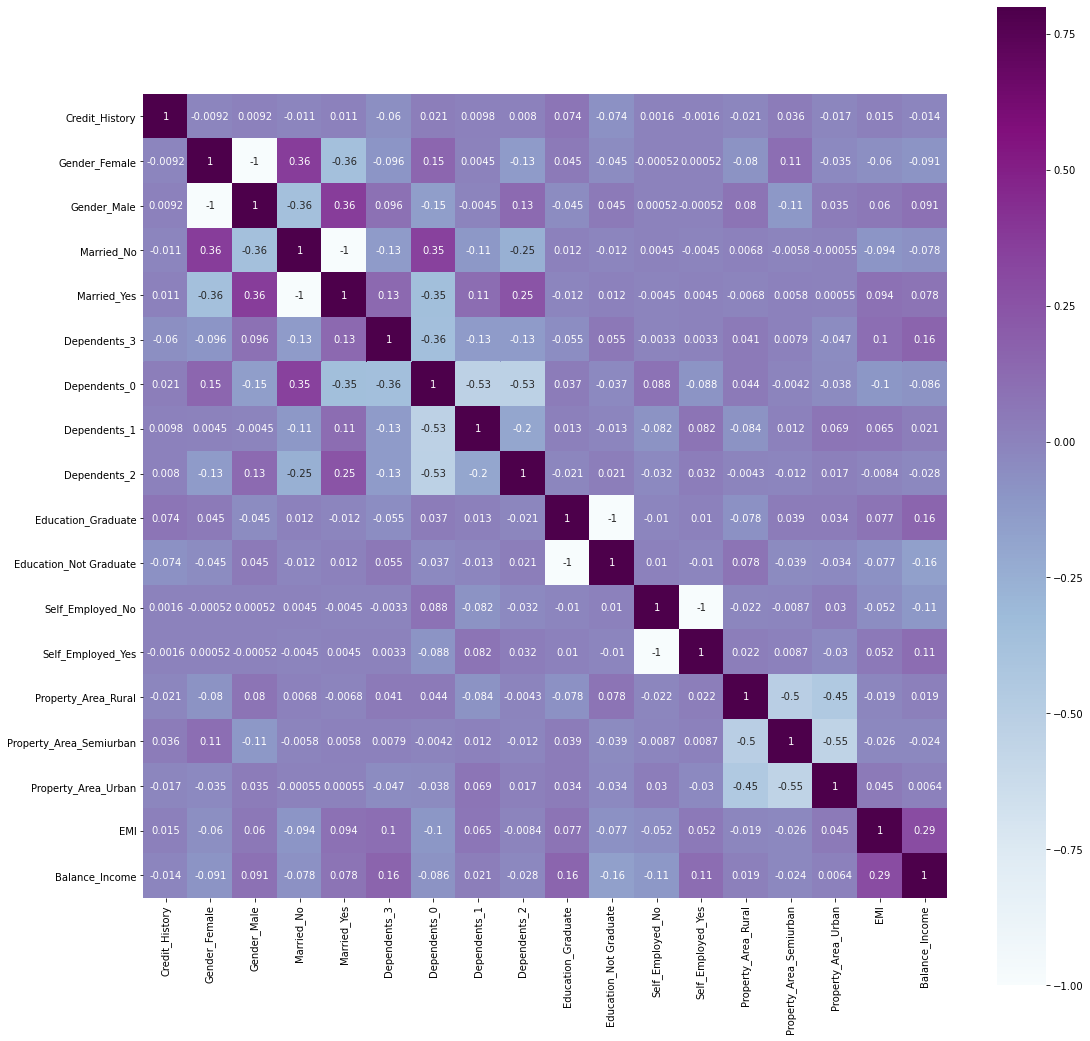

In [55]:
matrix = X.corr()
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

In [56]:
X.columns

Index(['Credit_History', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_3', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'EMI',
       'Balance_Income'],
      dtype='object')

In [57]:
X['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [58]:
X.head()

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,EMI,Balance_Income
0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0.355556,5493.444444
1,1.0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0.355556,5735.444444
2,1.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0.183333,2816.666667
3,1.0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0.333333,4607.666667
4,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0.391667,5608.333333


In [59]:
X.shape

(614, 18)

In [60]:
final_model = RandomForestClassifier(random_state=1, max_depth=7, n_estimators=61)

In [61]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3, random_state=1)

In [62]:
final_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=61, random_state=1)

In [63]:
y_pred = final_model.predict(x_cv)

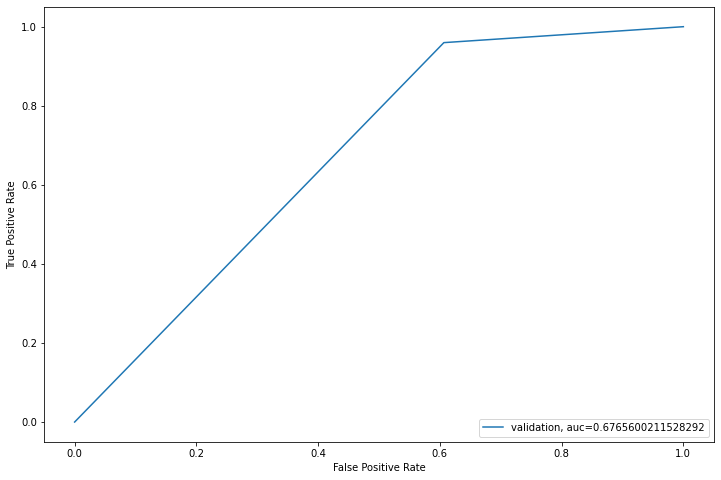

In [64]:
fpr, tpr, _ = metrics.roc_curve(y_cv, y_pred)
auc = metrics.roc_auc_score(y_cv, y_pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [65]:
metrics.f1_score(y_cv, y_pred)

0.85

In [66]:
metrics.precision_score(y_cv, y_pred)

0.7628205128205128

In [67]:
metrics.recall_score(y_cv, y_pred)

0.9596774193548387

In [68]:
import pickle

In [69]:
filename = 'finalized_model.sav'
#pickle.dump(final_model, open(filename, 'wb'))

In [70]:
X.values[0].shape

(18,)

In [71]:
X.values[0]

array([1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       3.55555556e-01, 5.49344444e+03])

In [72]:
t_sample = np.array([[1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       3.55555556e-01, 5.49344444e+03]])

In [73]:
final_model.predict(t_sample).tolist()[0]

1

In [74]:
y.values[0]

1

In [78]:
t2 = np.array([[1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.94444444e+00, 2.05555556e+03]])

In [79]:
final_model.predict(t2).tolist()[0]

1